<a href="https://colab.research.google.com/github/kazuki-komori/JR-ngram-similarity/blob/master/JR_ngram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

setup

In [22]:
!pip install openpyxl
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
# !pip install mecab-python3
!pip install janome
!pip install japanize-matplotlib
!pip install -U ginza
# ginza setup
import pkg_resources, imp
imp.reload(pkg_resources)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.8)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.13)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+ma

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

#### テキストの読み込み


In [23]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data (1).xlsx


In [ ]:
import pandas as pd

data = pd.read_excel("data.xlsx", index_col = None)

In [59]:
bf_positive = data[((data["朝食_ポジティブ"] == 1) | (data["朝食_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
bf_negative = data[((data["朝食_ポジティブ"] == 1) | (data["朝食_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]
di_positive = data[((data["夕食_ポジティブ"] == 1) | (data["夕食_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
di_negative = data[((data["夕食_ポジティブ"] == 1) | (data["夕食_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]
ba_positive = data[((data["風呂_ポジティブ"] == 1) | (data["風呂_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
ba_negative = data[((data["風呂_ポジティブ"] == 1) | (data["風呂_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]
se_positive = data[((data["サービス_ポジティブ"] == 1) | (data["サービス_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
se_negative = data[((data["サービス_ポジティブ"] == 1) | (data["サービス_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]
pl_positive = data[((data["立地_ポジティブ"] == 1) | (data["立地_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
pl_negative = data[((data["立地_ポジティブ"] == 1) | (data["立地_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]
am_positive = data[((data["設備・アメニティ_ポジティブ"] == 1) | (data["設備・アメニティ_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
am_negative = data[((data["設備・アメニティ_ポジティブ"] == 1) | (data["設備・アメニティ_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]
ro_positive = data[((data["部屋_ポジティブ"] == 1) | (data["部屋_ネガティブ"] == 1)) & (data["最終的なタグ"] == 1)]
ro_negative = data[((data["部屋_ポジティブ"] == 1) | (data["部屋_ネガティブ"] == 1)) & (data["最終的なタグ"] == 0)]

In [62]:
bf_positive_txt

'全体的な感想は快適に過ごすことができて、また利用したいと思いました。また機会があればこちらに泊まりたいと、思いました。これが改善すれば完璧です全てにおいて素晴らしいです。残念なのは他の都市の名産を出していた事である。男性であれば足りないと思います。それ以外は良かったです。また行きたいです。見せる演出が素敵でかなり高評価です。また利用させていただきたいと思います。今回の旅行でリゾートホテル等にも泊まりましたが、こちらの宿が1番良かったと言っています。有り難うございました。ぜひまた利用させていただきたいホテルです。この内容では高すぎます。それ以外はとてもいいお宿だなと思いました。評判通り、食べつくせないほどにありました。全体的にバランスのとれた過ごしやすい宿でして、スキーシーズンの際には満室な理由がよくわかりました。この点は、マルかな。また伺います。とても良いリラックス時間もてました！満足しました?！全てに目が行き届いていて、心地よく滞在できました。今回も、ここに来ると、来れて良かったな、と思います。見てよし食べてよし。今回、久しぶりでしたがゆっくり寛げました。山登家にとっては嬉しい宿であり、きっとリピーターも多だろうと思われました。これからは迷うことなく、都ホテルを選びます。また宿泊したいね♪と家族で話しているので次回もどうぞ宜しくお願い致します。種類も多くおいしかったです。今回も快適に過ごせました。また行きたいお宿です。本当にありがとうございました。安らげました。総じて、ビジネスで使うにはとても贅沢な時間を過ごすことが出来、ものすごく特をした気分を味わえました。ほかが良いだけに残念です。全体的には大変良かったです。良い思い出しかないホテルでした。それ以外にはすごく満足できるホテルでした。是非、また伺いたいです。食べる価値ある小さな子供連れだと、食器を引っかけたり、こぼしたりする可能性が高いので、テーブルをできるだけすっきりさせておきたい人は多いと思います。浜松の楽器博物館に寄ってから行ったので音楽にふれられる良い時間になり全体的に満足でした。決して美味しいとは言えない…二組しか予約なかったせいか廊下は節電？いまいちな点は、個人的な感想ですが、とても満足できる宿だと思います。今まで宿泊したホテルではＮＯ．こんなとこに2泊も連泊でとってしまい後悔しかありませんでした。

In [ ]:
# 不要
# bf_positive = data[data["朝食_ポジティブ"] == 1]
# bf_negative = data[data["朝食_ネガティブ"] == 1]
# di_positive = data[data["夕食_ポジティブ"] == 1]
# di_negative = data[data["夕食_ネガティブ"] == 1]
# ba_positive = data[data["風呂_ポジティブ"] == 1]
# ba_negative = data[data["風呂_ネガティブ"] == 1]
# se_positive = data[data["サービス_ポジティブ"] == 1]
# se_negative = data[data["サービス_ネガティブ"] == 1]
# pl_positive = data[data["立地_ポジティブ"] == 1]
# pl_negative = data[data["立地_ネガティブ"] == 1]
# am_positive = data[data["設備・アメニティ_ポジティブ"] == 1]
# am_negative = data[data["設備・アメニティ_ネガティブ"] == 1]
# ro_positive = data[data["部屋_ポジティブ"] == 1]
# ro_negative = data[data["部屋_ネガティブ"] == 1]


In [60]:
## データを取り出す
bf_positive_txt = "".join(bf_positive["レビュー文"].values.tolist())
bf_negative_txt = "".join(bf_negative["レビュー文"].values.tolist())
di_positive_txt = "".join(di_positive["レビュー文"].values.tolist())
di_negative_txt = "".join(di_negative["レビュー文"].values.tolist())
ba_positive_txt = "".join(ba_positive["レビュー文"].values.tolist())
ba_negative_txt = "".join(ba_negative["レビュー文"].values.tolist())
se_positive_txt = "".join(se_positive["レビュー文"].values.tolist())
se_negative_txt = "".join(se_negative["レビュー文"].values.tolist())
pl_positive_txt = "".join(pl_positive["レビュー文"].values.tolist())
pl_negative_txt = "".join(pl_negative["レビュー文"].values.tolist())
am_positive_txt = "".join(am_positive["レビュー文"].values.tolist())
am_negative_txt = "".join(am_negative["レビュー文"].values.tolist())
ro_positive_txt = "".join(ro_positive["レビュー文"].values.tolist())
ro_negative_txt = "".join(ro_negative["レビュー文"].values.tolist())

In [64]:
# テキストデータを辞書型で作成
data_dic = {}
data_dic["bf"] = [bf_positive_txt, bf_negative_txt]
data_dic["di"] = [di_positive_txt, di_negative_txt]
data_dic["ba"] = [ba_positive_txt, ba_negative_txt]
data_dic["se"] = [se_positive_txt, se_negative_txt]
data_dic["pl"] = [pl_positive_txt, pl_negative_txt]
data_dic["am"] = [am_positive_txt, am_negative_txt]
data_dic["ro"] = [ro_positive_txt, ro_negative_txt]

In [ ]:
f = open("/content/drive/MyDrive/JR/dbf_positive.txt", "a", encoding="UTF-8")
f.write("".join(bf_positive_list))
f.close()

18243

In [40]:
from janome.tokenizer import Tokenizer

def split_into_words(doc):
    """
    名詞だけを取り出してリストで戻す関数
    """
    try:
        t = Tokenizer(mmap=True)
        word_list = []
        # 形態素して取り出す
        for token in t.tokenize(doc):
            # 品詞の判定をして、名詞か動詞か形容詞だけを取り出す
            if (token.part_of_speech.split(",")[0] in ("名詞","動詞","形容詞")
                and  token.part_of_speech.split(",")[1] != "数"):  # ただし、数詞は使っても意味が薄いので捨てる
                # 表層形を登録する
                word_list.append(token.surface)
        return word_list
    except Exception as ex:
        print(ex)
        return []

In [41]:
import spacy

def ginza_split(doc):
  """
  ginzaで形態素解析がしたい
  """
  stop_words = ["思う", "良い", "いい", "よい"]
  nlp = spacy.load("ja_ginza")
  nlp_doc = nlp(doc)
  word_list = []
  for sent in nlp_doc.sents:
    for token in sent:
      if (token.tag_.split("-")[0] in ("名詞","動詞","形容詞") and  token.tag_.split("-")[1] != "数詞" and not token.is_stop and token.lemma_ not in stop_words):
        word_list.append(token.lemma_)
  return word_list

In [42]:
# スコア算出
def scorer(p_dic, n_dic):
  """
  スコアとスコアの影響を与えている内容を返す
  """
  counter = 0
  score_dic = {}
  for p in p_dic:
    for n in n_dic:
      if p == n:
        counter += 1
        if p in score_dic.keys():
          score_dic[p] += 1
        else:
          score_dic[p] = 1
  score_dic_sorted = sorted(score_dic.items(), key=lambda x:x[1], reverse=True)
  return counter / (len(p_dic) + len(n_dic)), score_dic_sorted

In [65]:
import numpy as np
scores = []
idxs = np.array(["朝食", "夕食", "風呂", "サービス", "立地", "設備・アメニティ", "部屋"])
idx = 0
score_dic_sim = {}
for key, d in data_dic.items():
  print("------------------", idxs[idx], "----------------")
  p_dic = ginza_split(d[0])
  n_dic = ginza_split(d[1])
  score, score_dic = scorer(p_dic, n_dic)
  score_dic_sim[idxs[idx]] = score_dic
  scores.append(score)
  idx += 1
  print(score)
  for i in range(7):
    print(score_dic[i])



------------------ 朝食 ----------------
1.67198233562316
('朝食', 1368)
('満足', 1056)
('美味しい', 810)
('食事', 453)
('ホテル', 416)
('食べる', 270)
('いただく', 210)
------------------ 夕食 ----------------
1.4850631352017247
('満足', 804)
('美味しい', 672)
('食事', 468)
('いただく', 252)
('夕食', 220)
('食べる', 212)
('料理', 210)
------------------ 風呂 ----------------
1.677341873498799
('風呂', 888)
('温泉', 497)
('満足', 462)
('入る', 198)
('露天風呂', 144)
('湯', 140)
('ホテル', 112)
------------------ サービス ----------------
4.123789020452099
('部屋', 2772)
('いただく', 2376)
('方', 1950)
('対応', 1764)
('スタッフ', 1620)
('ホテル', 1368)
('時', 1240)
------------------ 立地 ----------------
1.1784718349135528
('満足', 294)
('ホテル', 285)
('便利', 210)
('駅', 145)
('行く', 120)
('近い', 100)
('利用', 88)
------------------ 設備・アメニティ ----------------
2.1802622805067795
('部屋', 2176)
('ホテル', 1530)
('満足', 540)
('方', 208)
('駐車場', 198)
('時', 153)
('利用', 140)
------------------ 部屋 ----------------
4.101222826086956
('部屋', 7260)
('広い', 630)
('満足', 555)
('お部屋', 520)
('ホテル', 500

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


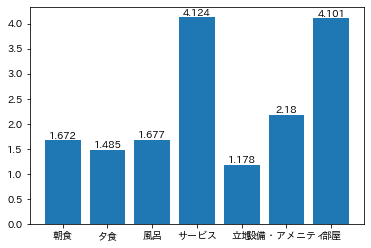

In [66]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt

left = np.array(["朝食", "夕食", "風呂", "サービス", "立地", "設備・アメニティ", "部屋"])
scores_rounded = np.round(scores, decimals=3)
for x, y in zip(left, scores_rounded):
    plt.text(x, y, y, ha='center', va='bottom')
plt.bar(left, scores)
plt.savefig("/content/drive/MyDrive/JR/scores.png")

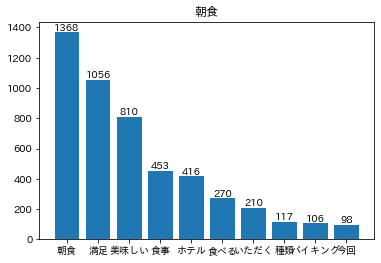

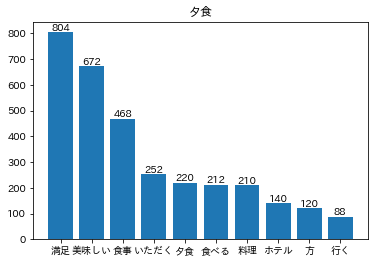

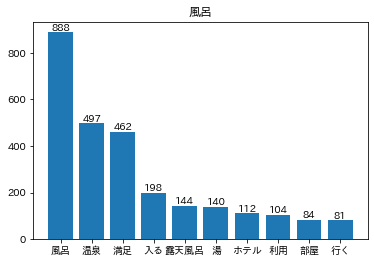

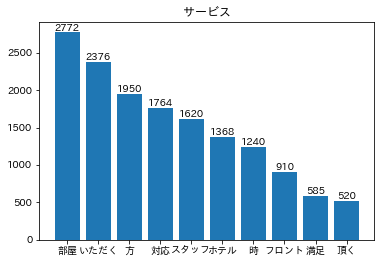

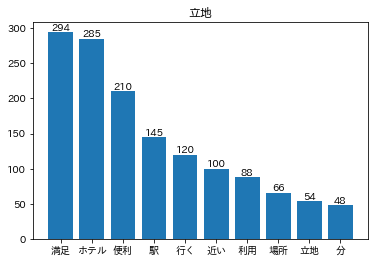

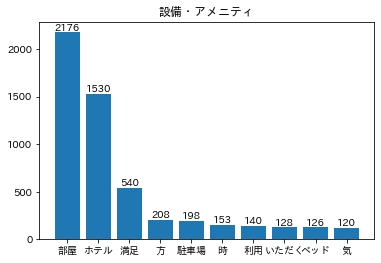

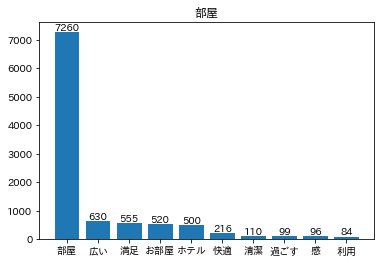

In [67]:
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt

idx = np.array(["朝食", "夕食", "風呂", "サービス", "立地", "設備・アメニティ", "部屋"])
for i in idx:
  plt_scores = []
  plt_tags = []
  for x in score_dic_sim[i][0:10]:
    plt_tags.append(x[0])
    plt_scores.append(x[1])
  for x, y in zip(plt_tags, plt_scores):
    plt.text(x, y, y, ha='center', va='bottom')
  plt.title(i)
  plt.bar(plt_tags, plt_scores)
  plt.show()